### Load Data

In [1]:
import pandas as pd

data = pd.read_csv("./data/assignment_4_frap/photobleaching_data.csv")

### Raw Fluorescence Intensity

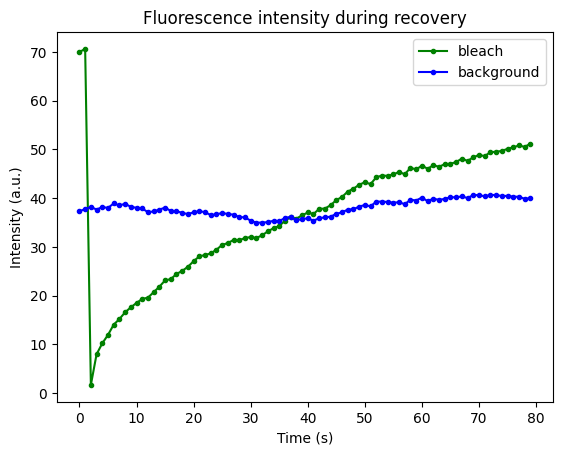

In [2]:
import matplotlib.pyplot as plt

plt.plot(data["Time_(s)"], data["bleach"], c="g", marker=".")
plt.plot(data["Time_(s)"], data["background"], c="b", marker=".")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (a.u.)")
plt.title("Fluorescence intensity during recovery")
plt.legend(["bleach", "background"])

### Background correction

In [3]:
# Background correction (Assume the background fluorescence is constant)
background_mean = data["background"].mean()
data["adjustment_ratio"] = background_mean / data["background"]
data["bleach_corrected"] = data["bleach"] * data["adjustment_ratio"]

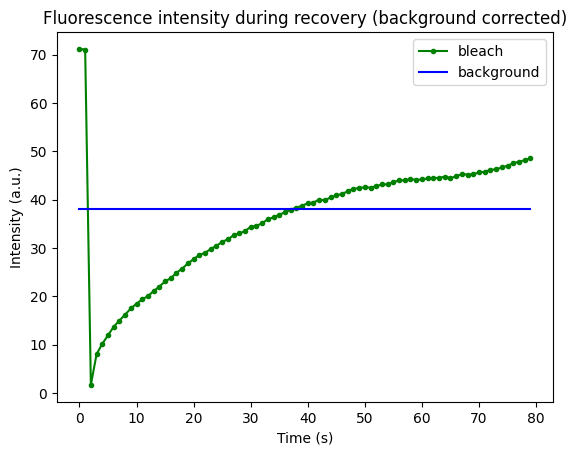

In [4]:
fig, ax = plt.subplots()
ax.plot(data["Time_(s)"], data["bleach_corrected"], c="g", marker=".")
ax.plot(data["Time_(s)"], data["background"] * data["adjustment_ratio"], c="b")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Intensity (a.u.)")
ax.set_title("Fluorescence intensity during recovery (background corrected)")
ax.legend(["bleach", "background"])

### Fit the Fluorescence Intensity Model

$I(t) = A \, (1 - e^{-\frac{t}{\tau}})$

In [5]:
from scipy.optimize import curve_fit
import numpy as np

def recovery_func(t, A, tau):
    return A * (1 - np.exp(-t / tau))

def get_data_for_fitting(t):
    x = data["Time_(s)"][2:] - t  # Assume photobleaching starting from time t
    y = data["bleach_corrected"][2:]
    return x, y

initial_guess = [1, 1]
# Equation 1
params_1, _ = curve_fit(recovery_func, *(get_data_for_fitting(t=1)), p0=initial_guess)
print(f"Equation 1: A = {params_1[0]:.2f}, tau = {params_1[1]:.2f}")

# Equation 2
params_2, _ = curve_fit(recovery_func, *(get_data_for_fitting(t=2)), p0=initial_guess)
print(f"Equation 2: A = {params_2[0]:.2f}, tau = {params_2[1]:.2f}")

Equation 1: A = 47.40, tau = 21.38
Equation 2: A = 46.83, tau = 19.78


$I_1(t) = 47.40 \, (1 - e^{-\frac{t - 1}{21.38}}), \, t \geq 2$ \
$I_2(t) = 46.83 \, (1 - e^{-\frac{t - 2}{19.78}}), \, t \geq 2$

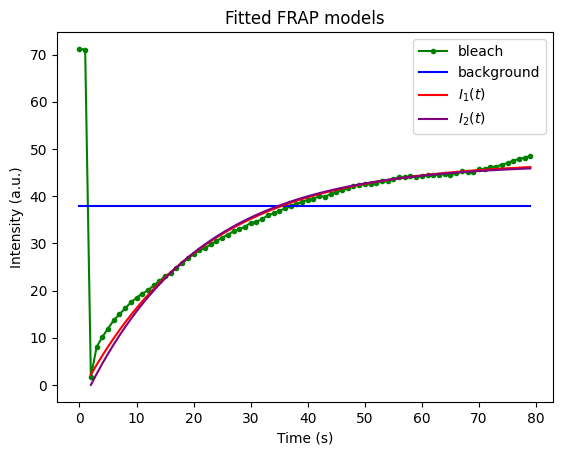

In [6]:
t_range = np.arange(2, 80)
ax.plot(t_range, recovery_func(t_range - 1, params_1[0], params_1[1]), c="r")
ax.plot(t_range, recovery_func(t_range - 2, params_2[0], params_2[1]), c="purple")
ax.set_title("Fitted FRAP models")
ax.legend(["bleach", "background", r"$I_1(t)$", r"$I_2(t)$"])
fig